In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [175]:
class ElmanNeuralNetwork:
    def __init__(self, dataset_size, total_sequence_number, train_sequence, alpha_f, alpha_x, method,
                 iteration_max=1000):
        
        # Private variable
        self.__total_sequence_index = total_sequence_number
        self.__alpha_f = alpha_f
        self.__alpha_x= alpha_x
        self.__method = method
        self.__iteration_max = iteration_max

        self.__delta_x = 0.001
        self.__delta_f = 0.001
        self.__eta_p = 1.2
        self.__eta_n = 0.5
        self.__sign_d_x = 0
        self.__sign_d_f = 0
        
        # Public variable
        self.v_neurons = np.random.rand(2, 1)

        self.data_x = np.random.randint(2, size=(dataset_size, total_sequence_number))

        self.train_data = self.data_x[:train_sequence]
        self.output_train_data = self.__generate_train_output()

        self.test_data = self.data_x[(total_sequence_number - train_sequence):]

        self.predicted_value = np.zeros([np.size(self.train_data, 0), 1])
        self.predicted_result = []
        self.__error_log = []
    
    # Private Methode
    
    def __generate_train_output(self):
        output = np.zeros([np.size(self.train_data, 0), 1])
        for i in range(np.size(self.train_data, 0)):
            output[i, :] = np.sum(self.train_data[i, :])
        return output

    def __generate_test_output(self):
        output = []
        for i in range(np.size(self.test_data, 0)):
            output.append(np.sum(self.test_data[i, :]))
        return output

    def __delta_v_f(self):
        delta = 0
        for t in range(self.__total_sequence_index):
            delta += (np.sum(self.__delta() * self.predicted_value[t])) * \
                     (self.v_neurons[0, :] ** (self.__total_sequence_index - t))
        return delta

    def __delta_v_x(self):
        delta = 0
        for t in range(self.__total_sequence_index):
            delta += (np.sum(self.__delta() * self.train_data[t])) * \
                     (self.v_neurons[0, :] ** (self.__total_sequence_index - t))
        return delta

    @staticmethod
    def __sign_x(x):
        if x > 0:
            return 1
        else:
            return -1

    def __switch_delta(self, x, y, d):
        if x == y:
            return d * self.__eta_p
        else:
            return d * self.__eta_n
    
    def __delta(self):
        return self.predicted_value - self.output_train_data

    def __error(self):
        squares = self.__delta() ** 2
        return np.sum(squares) / 2
    
    def __froward_propagation(self, x_value, f_value):
        return (self.v_neurons[0] * f_value) + (self.v_neurons[1] * x_value)

    def __back_propagation(self):
        self.v_neurons[0, :] -= self.__alpha_f * self.__delta_v_f()
        self.v_neurons[1, :] -= self.__alpha_x* self.__delta_v_x()

    def __resilient_propagation(self):
        d_f = self.__sign_x(self.__delta_v_f())
        d_x = self.__sign_x(self.__delta_v_x())
        
        self.v_neurons[0, :] -= d_f * self.__switch_delta(d_f, self.__sign_d_f, self.__delta_f)
        self.v_neurons[1, :] -= d_f * self.__switch_delta(d_x, self.__sign_d_x, self.__delta_x)
    
    # Public Methode

    def train_model(self):
        for iter in range(self.__iteration_max):
            self.predicted_value = np.zeros([np.size(self.train_data, 0), 1])
            for i in range(np.size(self.train_data, 0)):
                f_value = 0
                for j in range(np.size(self.train_data, 1)):
                    f_value = self.__froward_propagation(self.train_data[i, j], f_value)[0]

                self.predicted_value[i,:] = f_value

            self.__error_log.append(self.__error())

            if self.__method == "BP":
                self.__back_propagation()

            if self.__method == "RP":
                self.__resilient_propagation()

    def test_model(self,test_data=None):
        if test_data is not None :
            self.test_data = test_data
        for i in range(np.size(self.test_data, 0)):
            f_value = 0
            for j in range(np.size(self.test_data, 1)):
                f_value = self.__froward_propagation(self.test_data[i, j], f_value)
            self.predicted_result.append(f_value.tolist()[0])

    def show_error_log(self):
        plt.plot(self.__error_log)
        plt.ylabel("__error")
        plt.xlabel("Itteration")
        plt.show()

    def show_train_data_frame(self):
        d = {'train data': self.output_train_data.transpose().tolist()[0],
             'train predicted result': self.predicted_value.transpose().tolist()[0]}
        return pd.DataFrame(data=d)

    def show_test_data_frame(self):
        test_out = self.__generate_test_output()
        print(test_out)
        print(self.predicted_result)
        d = {'real test result': test_out,
             'test predicted result': self.predicted_result}
        return pd.DataFrame(data=d)

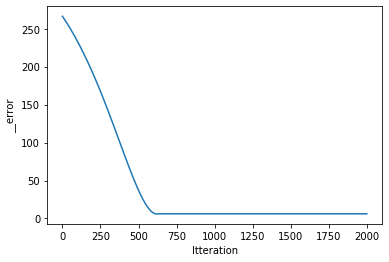

[6]
[4.5126328203814055]


,real test result,test predicted result
0,6,4.512633


In [176]:
elman = ElmanNeuralNetwork(dataset_size=40, total_sequence_number=8, train_sequence=30,
                           alpha_f=1e-4, alpha_x=5e-4, method="RP", iteration_max=2000)

elman.train_model()
elman.test_model(np.array([[0,0,1,1,1,1,1,1]]))

elman.show_error_log()

# elman.show_train_data_frame()
elman.show_test_data_frame()
# print(elman.output_train_data.transpose().tolist()[0])


